# Feature Engineering and Selection
# Checking the Python Environment

This is to ensure that the correct Python environment is set up correctly and used

In [1]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Downloads\Machine Learning Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\Downloads\Machine Learning Assignment\ml-venv\Scripts\python.exe
Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x00000271ED28F790>
Sys paths: ['C:\\Users\\hp\\Downloads\\Machine Learning Assignment', 'C:\\Users\\hp\\anaconda3\\python311.zip', 'C:\\Users\\hp\\anaconda3\\DLLs', 'C:\\Users\\hp\\anaconda3\\Lib', 'C:\\Users\\hp\\anaconda3', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv', '', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment']


# Importing Libraries

This is to ensure that the necessary libraries are imported and used

In [2]:
# For DataFrame
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For serialisation and de-serialisation
import pickle

# Loading the Dataset

Following shows the raw dataset that is loaded into the notebook

In [3]:
df = pd.read_csv(r'../raw_data/standard_scaled_customer.csv', index_col = 'CUST_ID')

# Feature Engineering and Selection

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca_features_data = pca.fit_transform(df)

df_pca = pd.DataFrame(pca_features_data, index = df.index, columns = [f'PC{i+1}' for i in range(pca_features_data.shape[1])])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
CUST_ID,,,,,,,,,,,,,,,
C10001,-1.124773,-2.447575,0.495158,-1.142428,-0.043463,0.193297,0.507759,0.178910,-0.337747,0.221300,-0.400575,0.764085,-0.425417,-0.033360,-0.037909
C10002,3.054062,0.191950,-0.075694,0.320844,1.679767,0.463606,-0.729784,0.377664,-0.022563,-0.464262,-0.007089,-0.103571,0.078075,-0.073304,-0.099503
C10003,-0.542332,1.591993,-2.716551,-1.560662,-0.597392,0.144857,-0.587275,-0.682945,0.200562,-0.357353,-1.176819,-0.111540,0.248188,0.104006,0.035739
C10004,1.115735,-1.198867,-1.498596,-1.078874,-0.316711,-1.422283,-0.141599,-1.777052,1.439418,-0.139363,1.276327,-0.028568,0.629408,-0.163353,-0.236400
C10005,-0.041998,-1.365690,-0.638746,-1.806113,-0.160600,1.005409,-0.050614,0.531433,-0.538733,0.402529,0.010251,-0.008407,0.328014,0.009110,-0.000473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,-2.345057,-2.373459,1.664282,2.011455,-2.725707,1.137621,-1.970087,0.320730,-0.938102,-0.104127,0.052253,-0.106350,-0.033741,-0.105248,0.084199
C19187,-1.703645,-2.083915,1.887767,0.846821,-3.245506,0.140943,-1.956470,0.701655,-0.922128,-0.047445,-0.262663,-0.325245,-0.874301,-0.353063,0.060173
C19188,-1.939407,-2.911304,1.352148,1.383573,-3.034354,0.238890,-1.910977,0.304637,-0.412864,-0.072593,-0.147063,-0.081533,-0.264375,-0.075873,0.069454


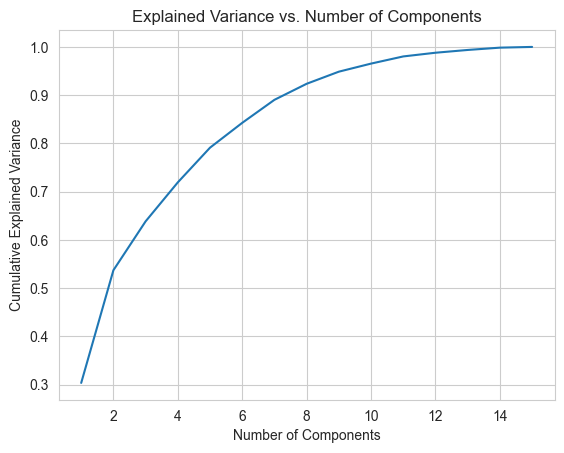

In [5]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

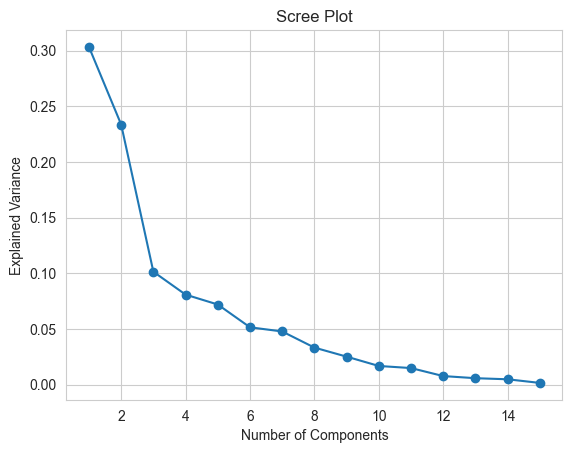

In [6]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

It can be seen that most variance are explain by the first 5 components. Therefore, we will use the first 5 components for the model for experimental purposes

# Saving the Dataset

In [8]:
df_pca = df_pca.iloc[:, :5]
df_pca.to_csv(r'../raw_data/customer_pca_5_.csv')